In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the login data
login_data = pd.read_csv("iitm2.csv")

# Encode categorical columns
label_encoder = LabelEncoder()
login_data['Gender'] = label_encoder.fit_transform(login_data['Gender'])
login_data['Nationality'] = label_encoder.fit_transform(login_data['Nationality'])
login_data['Device'] = label_encoder.fit_transform(login_data['Device'])
login_data['OS'] = label_encoder.fit_transform(login_data['OS'])
login_data['Name'] = label_encoder.fit_transform(login_data['Name'])
login_data['Email'] = label_encoder.fit_transform(login_data['Email'])

# Convert 'Time_of_Login' to datetime and extract hour and minute
login_data['Time_of_Login'] = pd.to_datetime(login_data['Time_of_Login'])
login_data['Hour'] = login_data['Time_of_Login'].dt.hour
login_data['Minute'] = login_data['Time_of_Login'].dt.minute

# Define features and target variable
X = login_data[['user_id', 'Email', 'Age', 'Gender', 'Nationality', 'Hour', 'Minute', 'Typing_Speed', 'Time_to_Complete_Captcha', 'Device', 'OS']]
y = login_data['Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.86      0.55      0.67        11

    accuracy                           0.73        22
   macro avg       0.76      0.73      0.72        22
weighted avg       0.76      0.73      0.72        22

Accuracy: 0.7272727272727273


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the login data
login_data = pd.read_csv("iitm2.csv")

# Encode categorical columns
label_encoder = LabelEncoder()
login_data['Gender'] = label_encoder.fit_transform(login_data['Gender'])
login_data['Nationality'] = label_encoder.fit_transform(login_data['Nationality'])
login_data['Device'] = label_encoder.fit_transform(login_data['Device'])
login_data['OS'] = label_encoder.fit_transform(login_data['OS'])
login_data['Name'] = label_encoder.fit_transform(login_data['Name'])
login_data['Email'] = label_encoder.fit_transform(login_data['Email'])

# Convert 'Time_of_Login' to datetime and extract hour and minute
login_data['Time_of_Login'] = pd.to_datetime(login_data['Time_of_Login'])
login_data['Hour'] = login_data['Time_of_Login'].dt.hour
login_data['Minute'] = login_data['Time_of_Login'].dt.minute

# Define features and target variable
X = login_data[['user_id', 'Email', 'Age', 'Gender', 'Nationality', 'Hour', 'Minute', 'Typing_Speed', 'Time_to_Complete_Captcha', 'Device', 'OS']]
y = login_data['Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Support Vector Machine (SVM) Classifier
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.64      0.58        11
           1       0.56      0.45      0.50        11

    accuracy                           0.55        22
   macro avg       0.55      0.55      0.54        22
weighted avg       0.55      0.55      0.54        22

Accuracy: 0.5454545454545454


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the login data
login_data = pd.read_csv("iitm2.csv")

# Encode categorical columns
label_encoder = LabelEncoder()
login_data['Gender'] = label_encoder.fit_transform(login_data['Gender'])
login_data['Nationality'] = label_encoder.fit_transform(login_data['Nationality'])
login_data['Device'] = label_encoder.fit_transform(login_data['Device'])
login_data['OS'] = label_encoder.fit_transform(login_data['OS'])
login_data['Name'] = label_encoder.fit_transform(login_data['Name'])
login_data['Email'] = label_encoder.fit_transform(login_data['Email'])

# Convert 'Time_of_Login' to datetime and extract hour and minute
login_data['Time_of_Login'] = pd.to_datetime(login_data['Time_of_Login'])
login_data['Hour'] = login_data['Time_of_Login'].dt.hour
login_data['Minute'] = login_data['Time_of_Login'].dt.minute

# Define features and target variable
X = login_data[['user_id', 'Email', 'Age', 'Gender', 'Nationality', 'Hour', 'Minute', 'Typing_Speed', 'Time_to_Complete_Captcha', 'Device', 'OS']]
y = login_data['Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the risk factor based on specified conditions
# You can adjust the conditions based on your specific criteria
age_threshold = 40
typing_speed_threshold = 50
time_to_complete_captcha_threshold = 20

risk_factor = ((X_test['Age'] > age_threshold) |
               (X_test['Typing_Speed'] < typing_speed_threshold) |
               (X_test['Time_to_Complete_Captcha'] > time_to_complete_captcha_threshold)).astype(int)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Display the calculated risk factor
print("Calculated Risk Factor:")
print(risk_factor)


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.86      0.55      0.67        11

    accuracy                           0.73        22
   macro avg       0.76      0.73      0.72        22
weighted avg       0.76      0.73      0.72        22

Accuracy: 0.7272727272727273
Calculated Risk Factor:
78     1
10     1
4      1
84     1
64     1
68     0
30     1
45     1
96     1
11     0
79     0
80     1
0      0
81     1
18     0
70     1
56     1
72     0
108    1
42     0
12     1
36     1
dtype: int32


In [48]:
model.predict([[14, 0, 23, 0, 4, 18, 15, 54, 16, 2, 1]])

c:\Users\vamsv\iitm\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

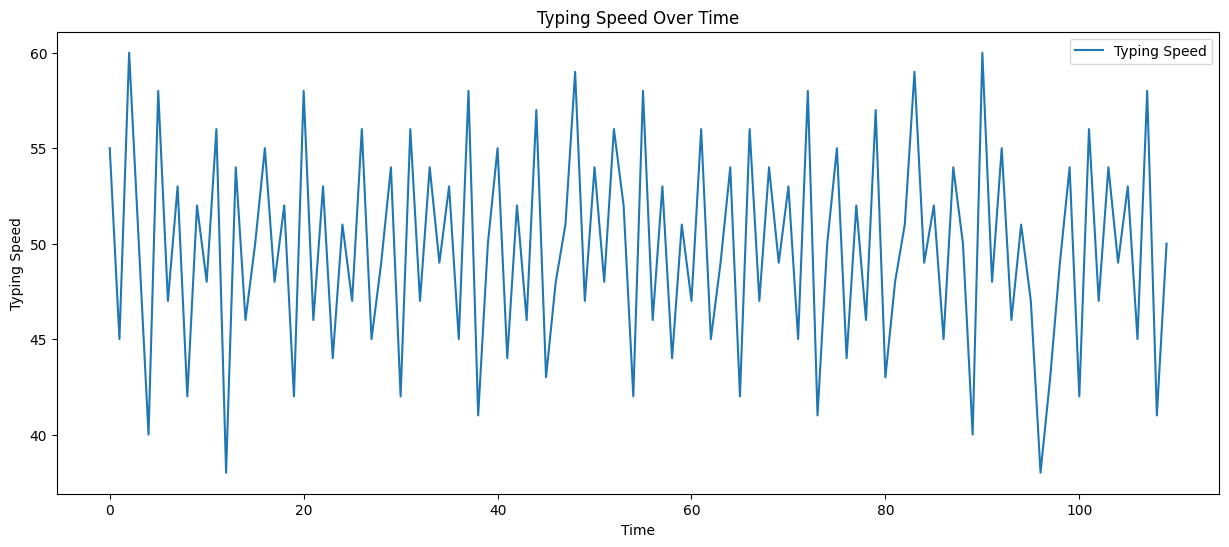

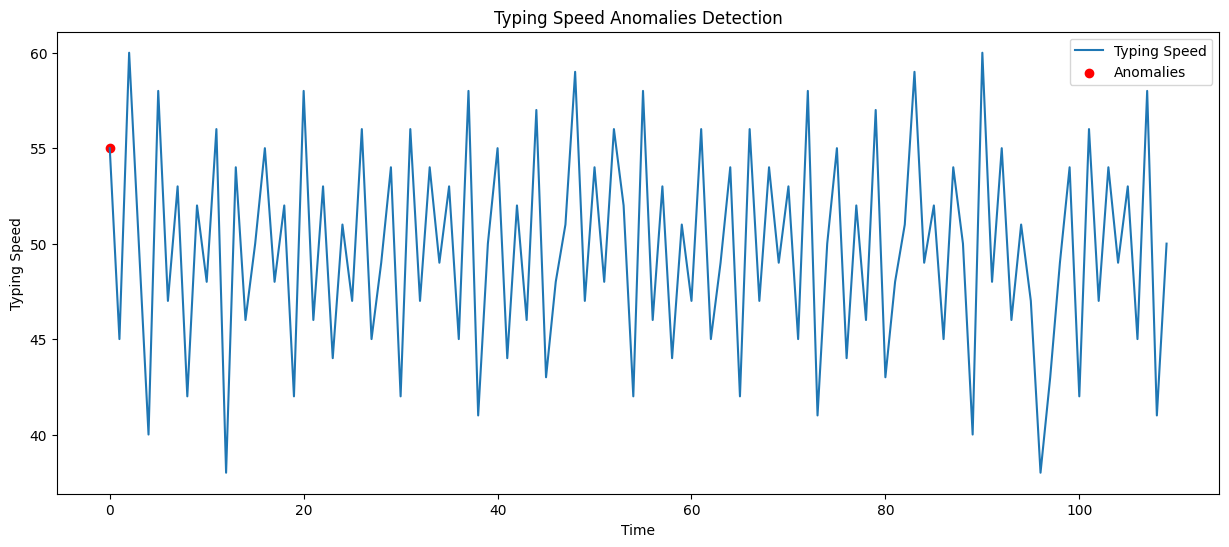

Detected Anomalies:
0    55
Name: Typing_Speed, dtype: int64


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset
# Assuming 'your_dataset.csv' is the name of your dataset file
df = pd.read_csv('iitm2.csv')

# Selecting the 'Typing_Speed' column for anomaly detection
typing_speed_series = df['Typing_Speed']

# Visualize the time series
plt.figure(figsize=(15, 6))
plt.plot(typing_speed_series, label='Typing Speed')
plt.title('Typing Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Typing Speed')
plt.legend()
plt.show()

# Fit ARIMA model
order = (5, 1, 0)  # Example order, you may need to tune these parameters
model = ARIMA(typing_speed_series, order=order)
results = model.fit()

# Get predicted values and residuals
predicted_values = results.fittedvalues
residuals = typing_speed_series - predicted_values

# Calculate mean and standard deviation of residuals
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Set a threshold for anomaly detection
threshold = mean_residuals + 3 * std_residuals

# Detect anomalies
anomalies = typing_speed_series[abs(residuals) > threshold]

# Visualize anomalies
plt.figure(figsize=(15, 6))
plt.plot(typing_speed_series, label='Typing Speed')
plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomalies')
plt.title('Typing Speed Anomalies Detection')
plt.xlabel('Time')
plt.ylabel('Typing Speed')
plt.legend()
plt.show()

# Display detected anomalies
print("Detected Anomalies:")
print(anomalies)


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate
from tensorflow.keras.models import Model



# Convert the data string to a DataFrame
df = pd.read_csv(r'iitm2.csv')

# Label Encoding for categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Nationality'] = label_encoder.fit_transform(df['Nationality'])
df['Device'] = label_encoder.fit_transform(df['Device'])
df['OS'] = label_encoder.fit_transform(df['OS'])

# Train-test split
X = df[['Gender', 'Nationality', 'Device', 'OS', 'Age', 'Typing_Speed', 'Time_to_Complete_Captcha']]
y = df['Risk']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Neural network model with embeddings
input_gender = Input(shape=(1,))
input_nationality = Input(shape=(1,))
input_device = Input(shape=(1,))
input_os = Input(shape=(1,))
input_age = Input(shape=(1,))
input_typing_speed = Input(shape=(1,))
input_time_to_complete_captcha = Input(shape=(1,))

embed_size = 10

embedding_gender = Embedding(input_dim=len(df['Gender'].unique()), output_dim=embed_size)(input_gender)
embedding_nationality = Embedding(input_dim=len(df['Nationality'].unique()), output_dim=embed_size)(input_nationality)
embedding_device = Embedding(input_dim=len(df['Device'].unique()), output_dim=embed_size)(input_device)
embedding_os = Embedding(input_dim=len(df['OS'].unique()), output_dim=embed_size)(input_os)

flat_gender = Flatten()(embedding_gender)
flat_nationality = Flatten()(embedding_nationality)
flat_device = Flatten()(embedding_device)
flat_os = Flatten()(embedding_os)

concat = Concatenate()([flat_gender, flat_nationality, flat_device, flat_os, input_age, input_typing_speed, input_time_to_complete_captcha])

dense1 = Dense(64, activation='relu')(concat)
output = Dense(1, activation='sigmoid')(dense1)

model = Model(inputs=[input_gender, input_nationality, input_device, input_os, input_age, input_typing_speed, input_time_to_complete_captcha], outputs=output)

# Compile and train the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit([X_train['Gender'], X_train['Nationality'], X_train['Device'], X_train['OS'], X_train['Age'], X_train['Typing_Speed'], X_train['Time_to_Complete_Captcha']], y_train, epochs=10, batch_size=8, validation_data=([X_val['Gender'], X_val['Nationality'], X_val['Device'], X_val['OS'], X_val['Age'], X_val['Typing_Speed'], X_val['Time_to_Complete_Captcha']], y_val))


Epoch 1/10
10/10 [==============================] - 1s 27ms/step - loss: 0.5584 - accuracy: 0.4416 - val_loss: 0.5000 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 0s 7ms/step - loss: 0.5583 - accuracy: 0.4416 - val_loss: 0.4990 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 0.5487 - accuracy: 0.4416 - val_loss: 0.3667 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.3288 - accuracy: 0.5195 - val_loss: 0.3421 - val_accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 0s 7ms/step - loss: 0.2740 - accuracy: 0.5455 - val_loss: 0.3202 - val_accuracy: 0.4375
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 0.2586 - accuracy: 0.5195 - val_loss: 0.3305 - val_accuracy: 0.4375
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.2621 - accuracy: 0.5195 - val_loss: 0.3185 - val_accuracy: 0.3750
Epoch 8/10
10/10 [=